In [ ]:
!pip install numpy-financial
#import libraries
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy_financial as npf

In [ ]:
#importing Income statement and Cash flow statement

import yfinance as yf
import pandas as pd

ticker = "GODREJCP.NS"
stock = yf.Ticker(ticker)

# Fetch Income Statement
income_statement = stock.financials
# Fetch Cash Flow Statement
cash_flow_statement = stock.cashflow

income_statement.columns = income_statement.columns.astype(str)

columns_to_keep = ['2021-03-31', '2022-03-31', '2023-03-31', '2024-03-31']
income_statement = income_statement[columns_to_keep]

cash_flow_statement.columns = cash_flow_statement.columns.astype(str)
cash_flow_statement = cash_flow_statement[columns_to_keep]

output_file = "income_statement.xlsx"
income_statement.to_excel(output_file)

output_file = "cash_flow.xlsx"
cash_flow_statement.to_excel(output_file)

print("Income Statement and Cash Flow Statement have been saved to 'financial_data.xlsx'")


Income Statement and Cash Flow Statement have been saved to 'financial_data.xlsx'


In [ ]:
#Importing Balance sheet

import yfinance as yf
import pandas as pd

ticker = "GODREJCP.NS"

# Step 2: Fetch the balance sheet data using yfinance
stock = yf.Ticker(ticker)
balance_sheet = stock.balance_sheet


balance_sheet.columns = balance_sheet.columns.astype(str)
columns_to_keep = ['2021-03-31', '2022-03-31', '2023-03-31', '2024-03-31']
balance_sheet = balance_sheet[columns_to_keep]

output_file = "balance_sheet.xlsx"
balance_sheet.to_excel(output_file)

print(f"Balance sheet data has been saved to {output_file}")


Balance sheet data has been saved to balance_sheet.xlsx


In [ ]:
#Common sizing of Balance sheet and income statement

import pandas as pd

bscomsize = pd.read_excel('balance_sheet.xlsx')
bscomsize.set_index('Unnamed: 0', inplace=True)

# Specify rows to be divided by Total Equity
divide_by_equity_rows = ['Retained Earnings', 'Total Debt']

# Extract divisor rows
total_assets = bscomsize.loc['Total Assets']
total_equity = bscomsize.loc['Total Equity Gross Minority Interest']  # Adjust based on your sheet

# Create a new DataFrame for common size calculations
common_size_bs = bscomsize.copy()

# Perform division row-wise
for row in bscomsize.index:
    if row in divide_by_equity_rows:
        common_size_bs.loc[row] = bscomsize.loc[row] / total_equity
    else:
        common_size_bs.loc[row] = bscomsize.loc[row] / total_assets

# Save the resulting common size balance sheet to an Excel file
common_size_bs.to_excel("common_size_bs.xlsx")

print("Common size balance sheet calculated and saved successfully!")

#Divide all values in income statement by the total revenue
iscomsize = pd.read_excel('income_statement.xlsx')
iscomsize.set_index('Unnamed: 0', inplace=True)
total_revenue = iscomsize.loc['Total Revenue']
common_size_is = iscomsize.div(total_revenue)
common_size_is.to_excel("common_size_is.xlsx")


Common size balance sheet calculated and saved successfully!


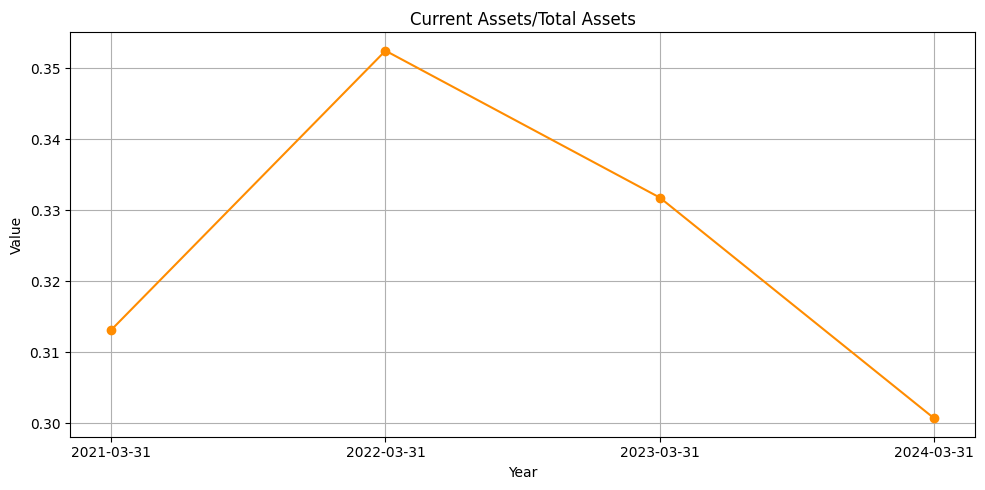

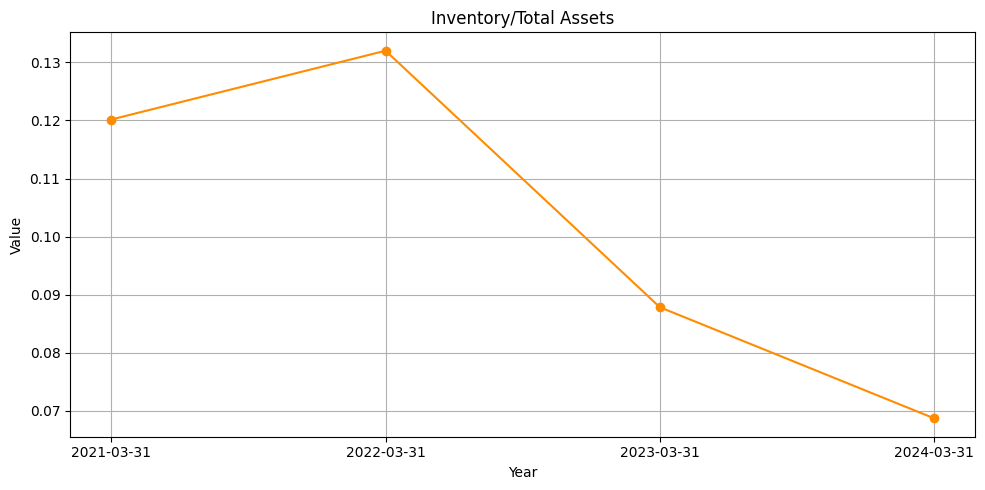

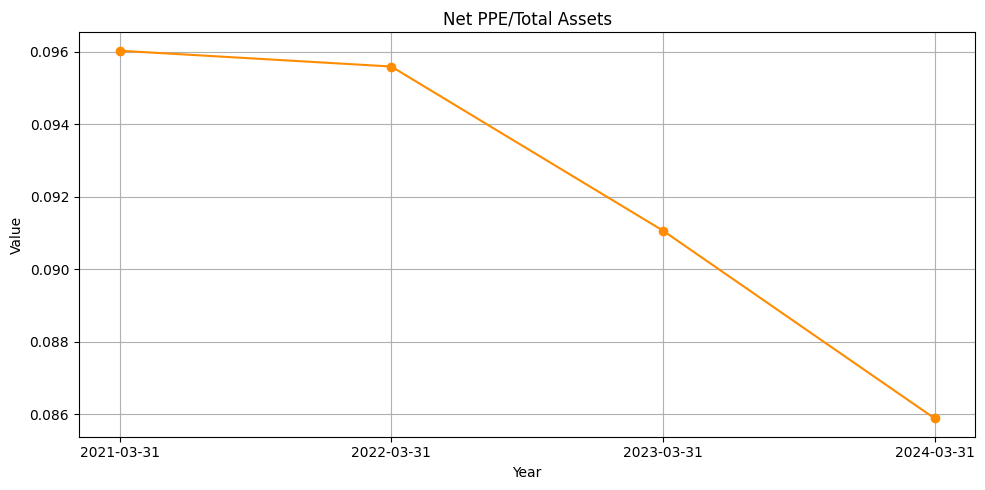

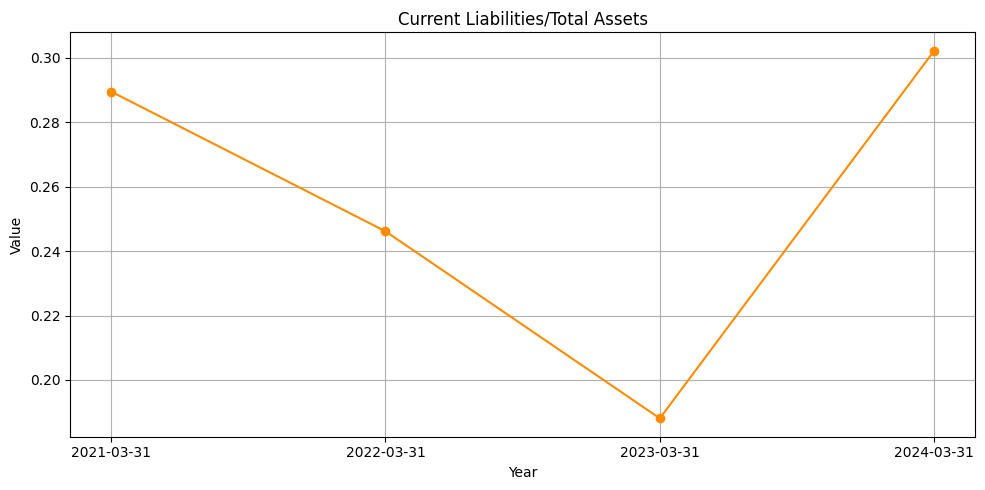

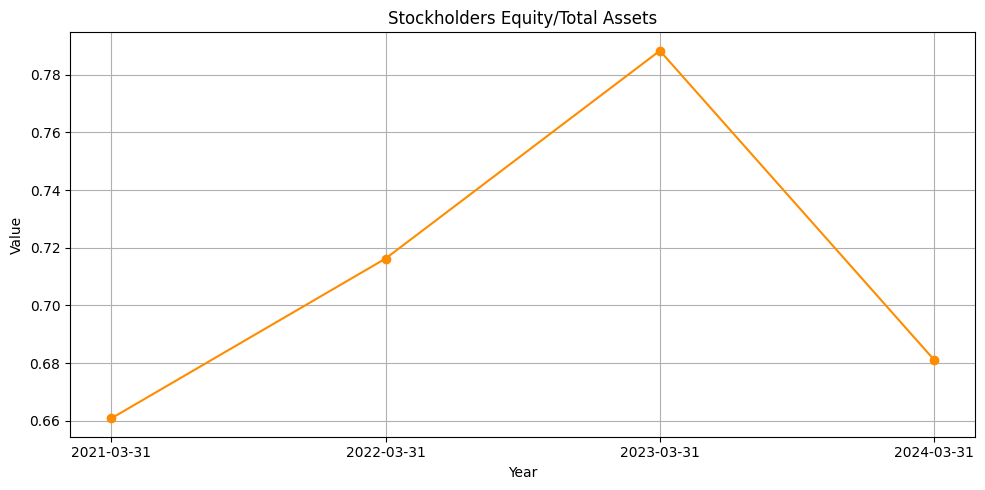

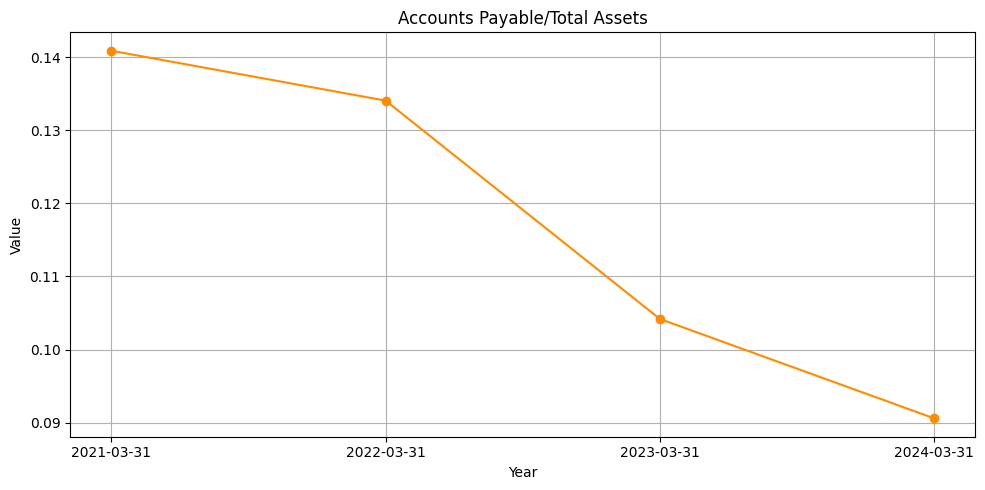

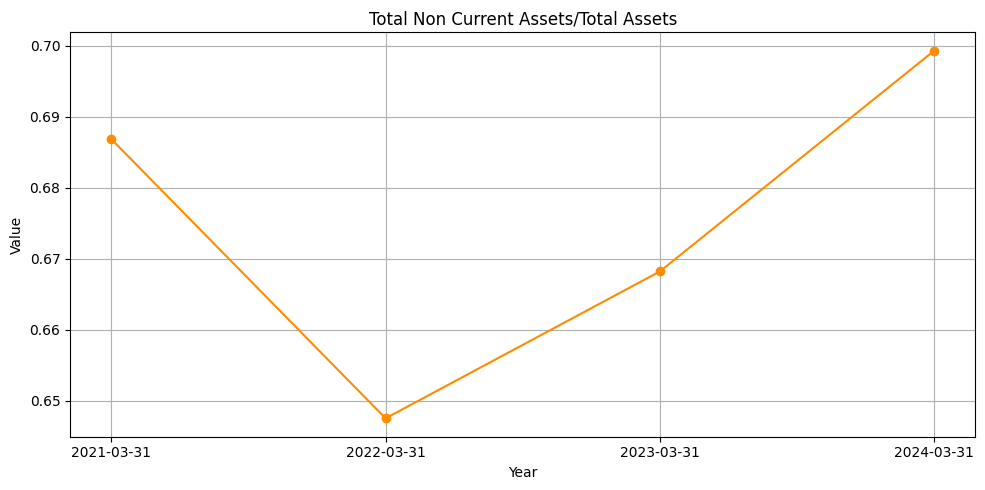

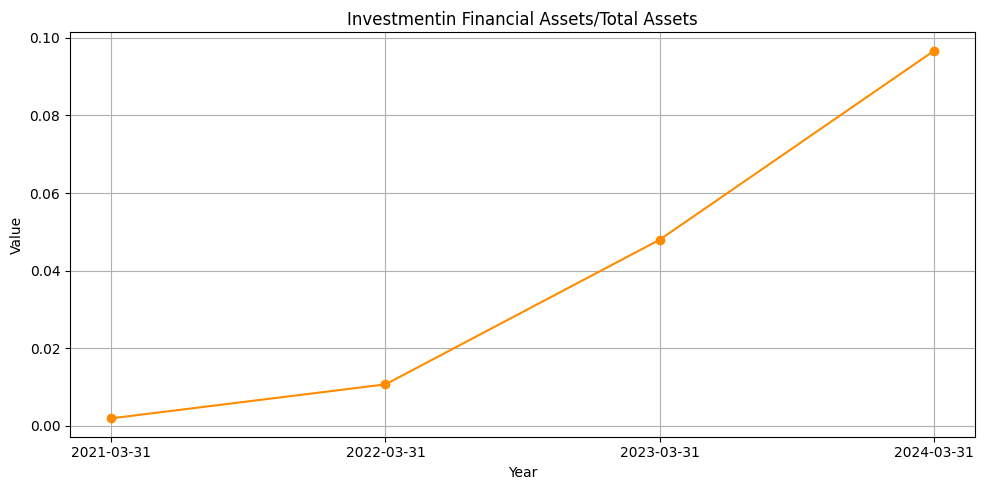

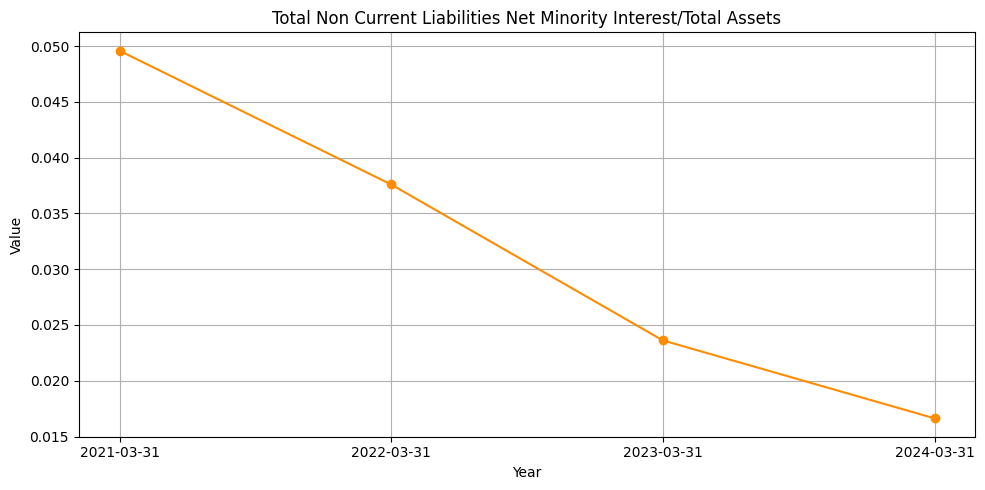

In [ ]:
#plotting the ratios from common sizing of balance sheet

import pandas as pd
import matplotlib.pyplot as plt

# Load the balance sheet Excel file
file_path = 'common_size_bs.xlsx'
balance_sheet = pd.read_excel(file_path, sheet_name='Sheet1')

# Set the index to the first column for easier manipulation
balance_sheet.set_index(balance_sheet.columns[0], inplace=True)

# List of ratios to plot
ratios_to_plot = [
    'Current Assets',#
    'Inventory',
    'Net PPE', #
    'Current Liabilities',#
    'Stockholders Equity', #
    'Accounts Payable',
    'Total Non Current Assets', #
    'Investmentin Financial Assets',
    'Total Non Current Liabilities Net Minority Interest'
]


# Plot each ratio on a separate graph
for ratio_name in ratios_to_plot:
    if ratio_name in balance_sheet.index:
        ratio_data = balance_sheet.loc[ratio_name]

        plt.figure(figsize=(10, 5))
        plt.plot(years, ratio_data, marker='o', color='darkorange')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.title(f'{ratio_name}/Total Assets')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


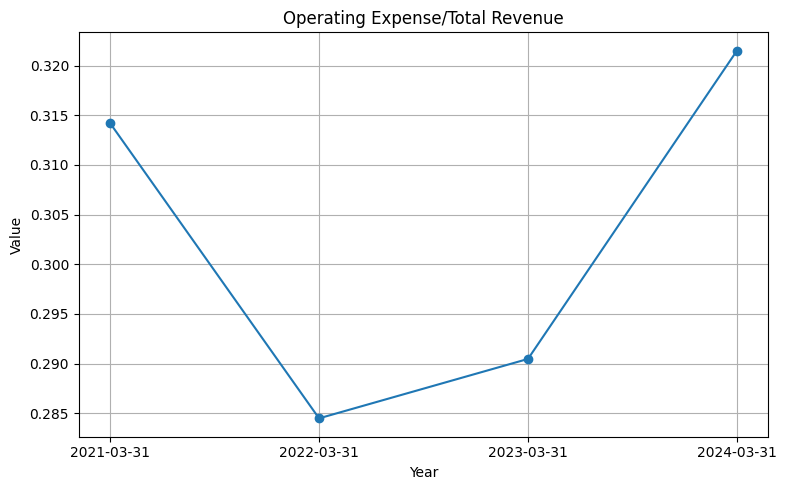

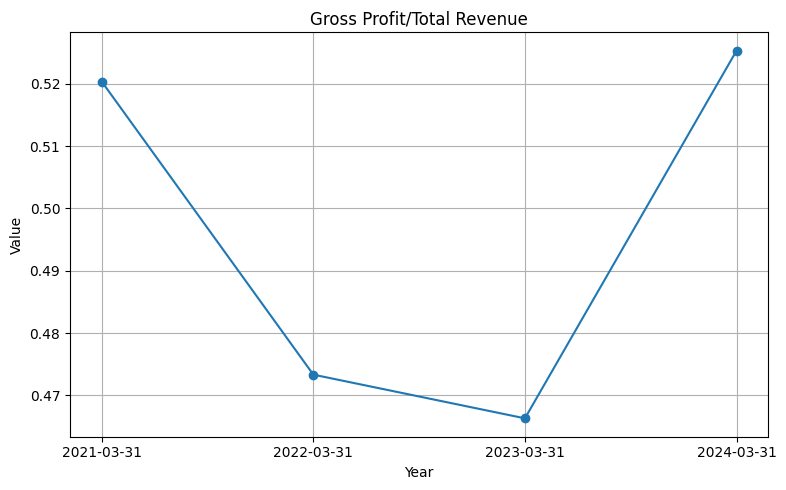

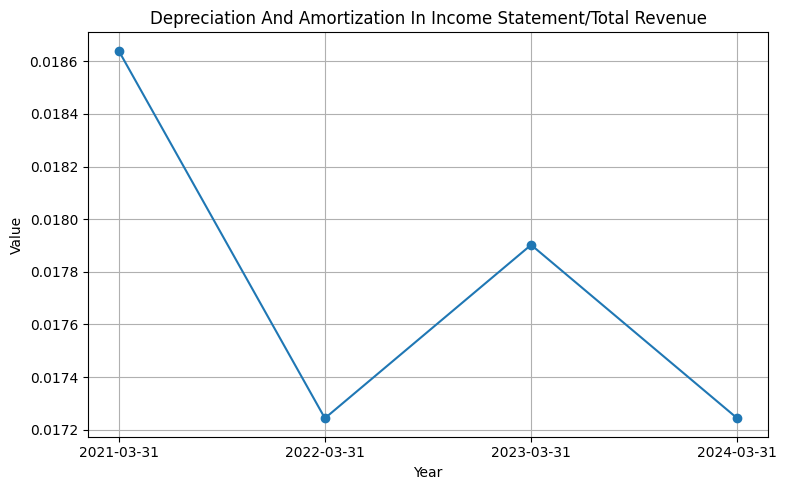

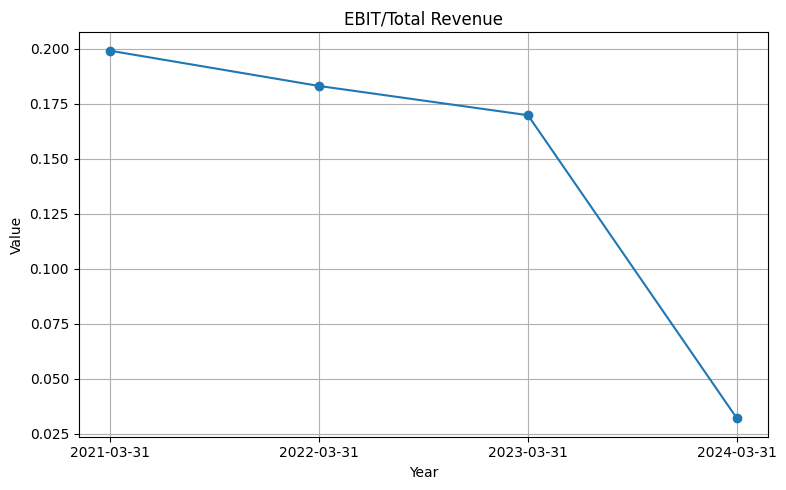

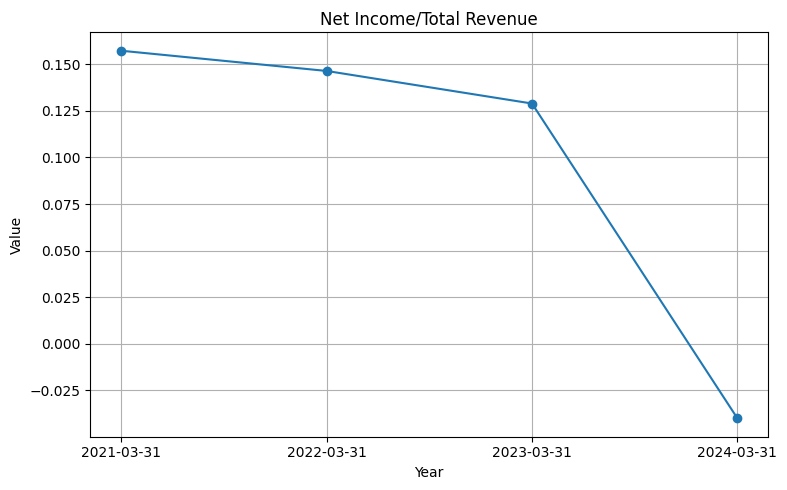

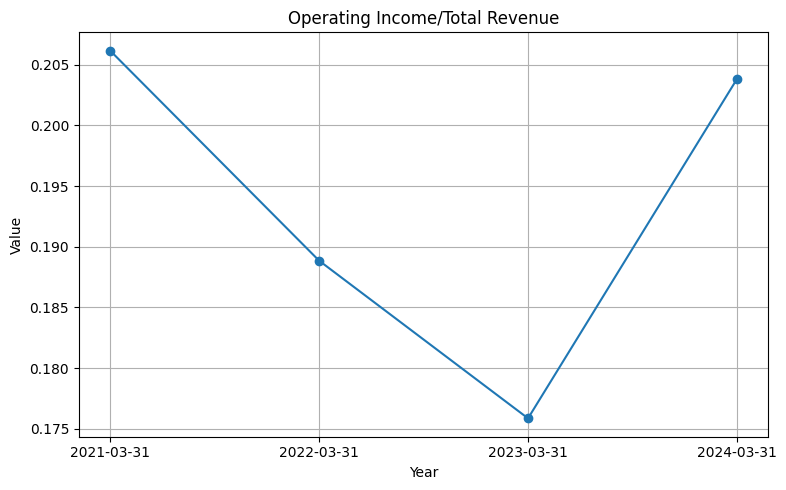

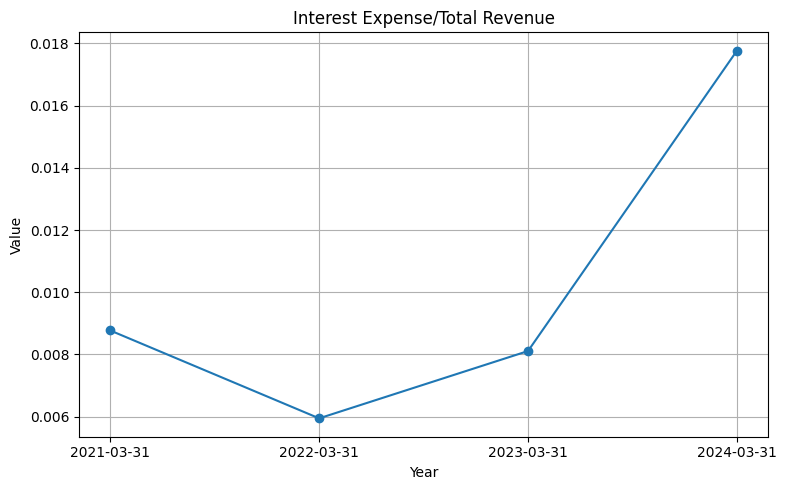

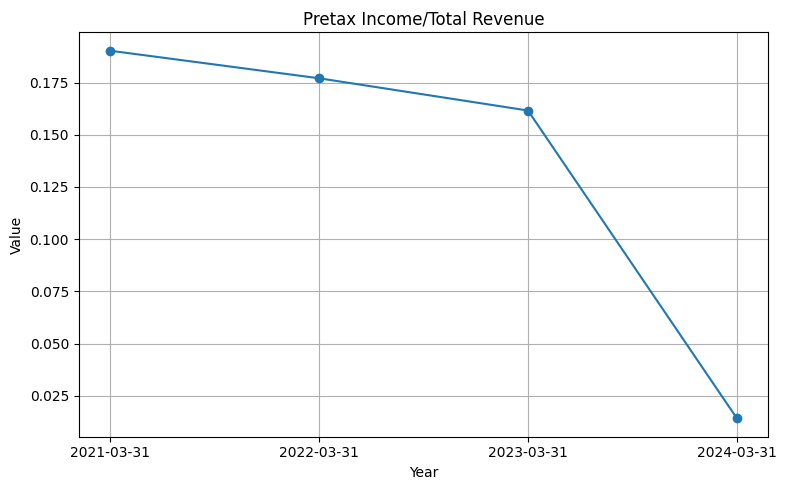

In [ ]:
#Plotting the ratios in common sizing of income statement

import pandas as pd
import matplotlib.pyplot as plt

# Load the balance sheet Excel file
file_path = 'common_size_is.xlsx'
income_statement = pd.read_excel(file_path, sheet_name='Sheet1')

# Set the index to the first column for easier manipulation
income_statement.set_index(income_statement.columns[0], inplace=True)

# List of ratios to plot
ratios_to_plot = [
    'Operating Expense',
    'Gross Profit',
    'Depreciation And Amortization In Income Statement',
    'EBIT',
    'Net Income',
    'Operating Income',
    'Interest Expense',
    'Pretax Income'
]


# Plot each ratio in a separate figure
for ratio_name in ratios_to_plot:
    if ratio_name in income_statement.index:
        ratio_data = income_statement.loc[ratio_name]

        plt.figure(figsize=(8, 5))
        plt.plot(years, ratio_data, marker='o')
        plt.title(f'{ratio_name}/Total Revenue')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [ ]:
#calculating graowth - horizontal analysis

import pandas as pd

# Load the Excel file
file_path = "income_statement.xlsx"  # Update with actual file path
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Rename the first column for clarity
df.rename(columns={df.columns[0]: "Field"}, inplace=True)

# Perform horizontal analysis (percentage change)
horizontal_analysis = df.copy()
horizontal_analysis.set_index("Field", inplace=True)
horizontal_analysis = horizontal_analysis.pct_change(axis=1) * 100

# Drop the first column as it will be NaN after pct_change
horizontal_analysis = horizontal_analysis.iloc[:, 1:]

# Reset index to bring back 'Field' as a column
horizontal_analysis.reset_index(inplace=True)

# Save to a new Excel file
horizontal_analysis.to_excel("horizontal_analysis.xlsx", index=False)


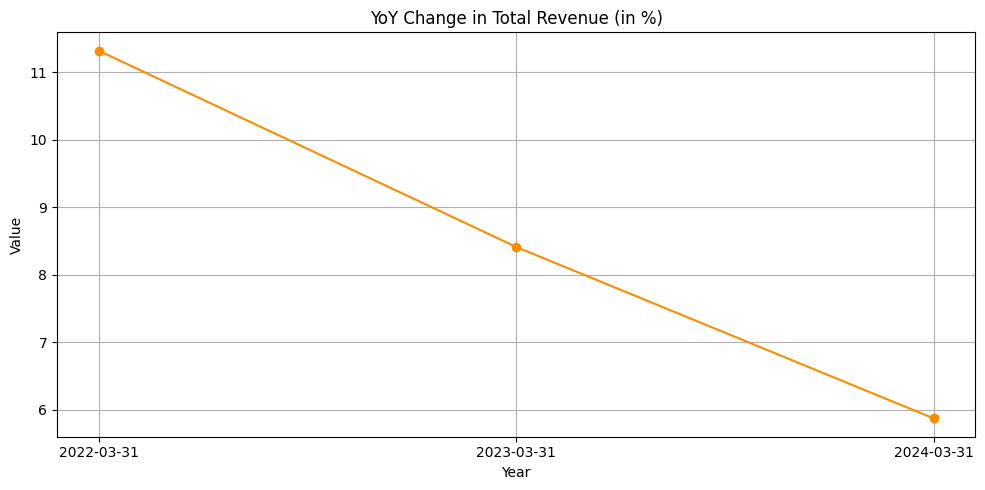

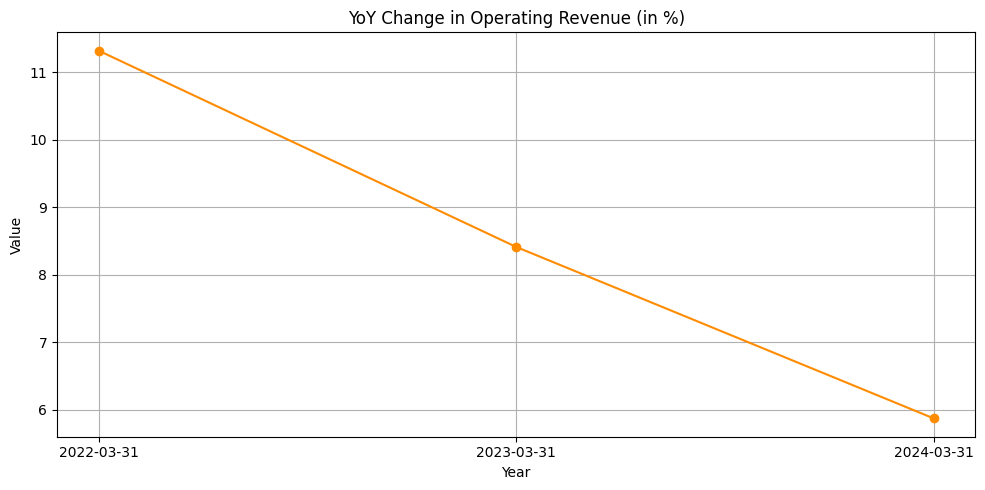

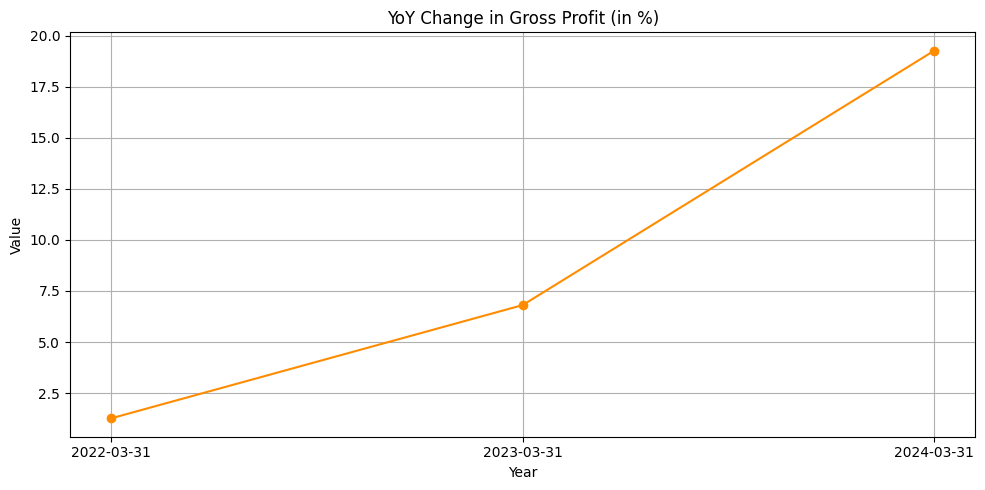

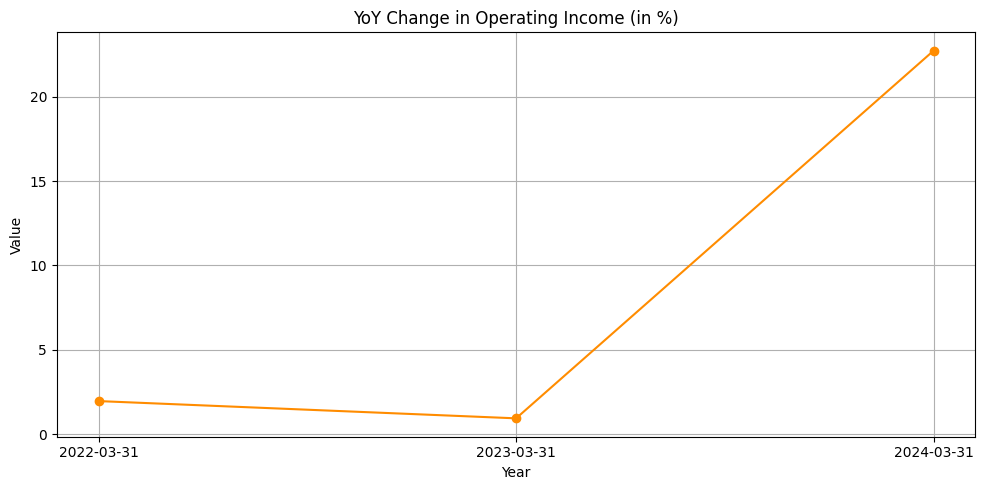

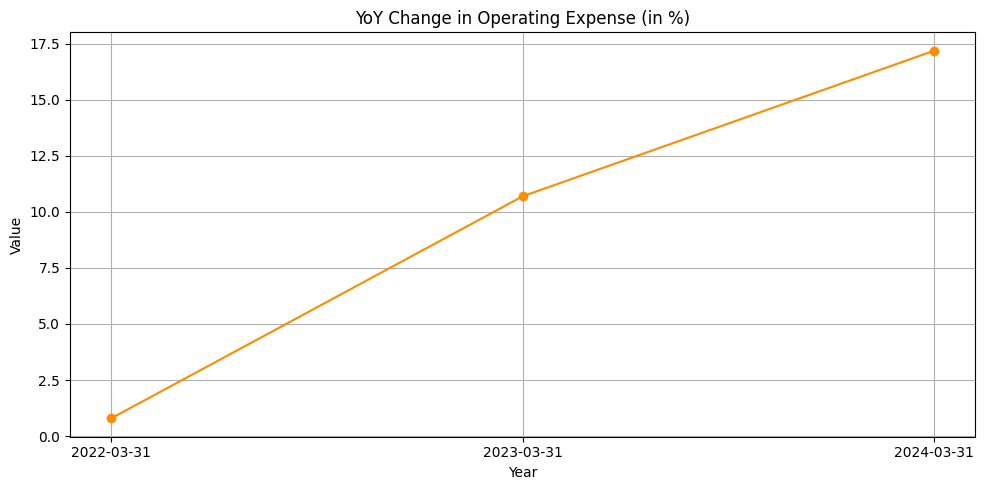

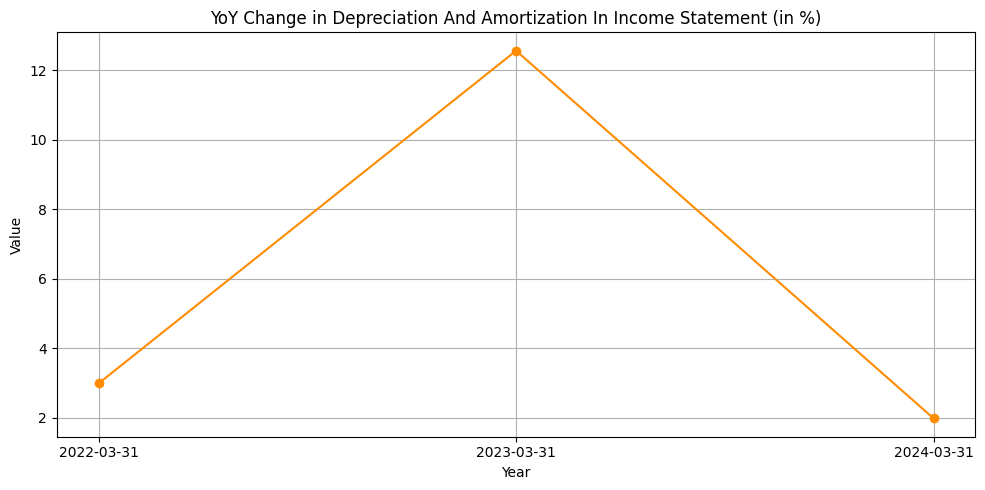

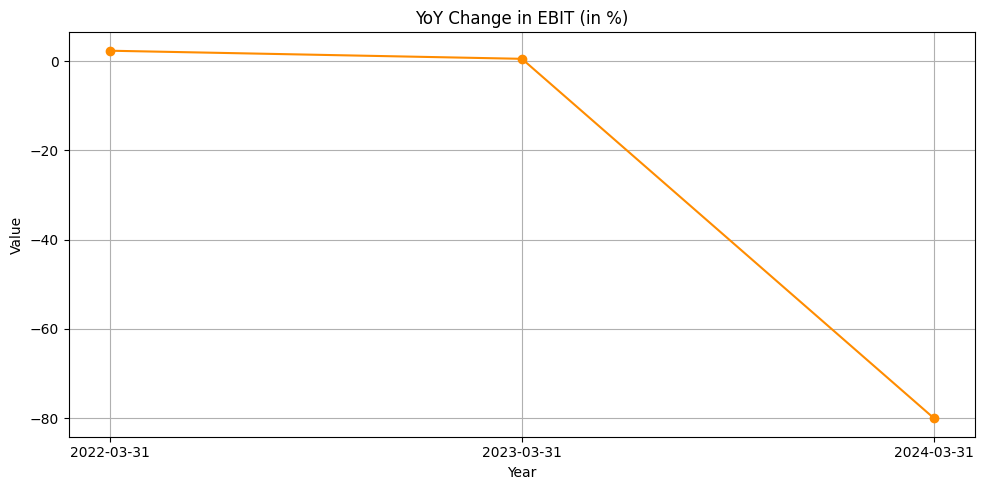

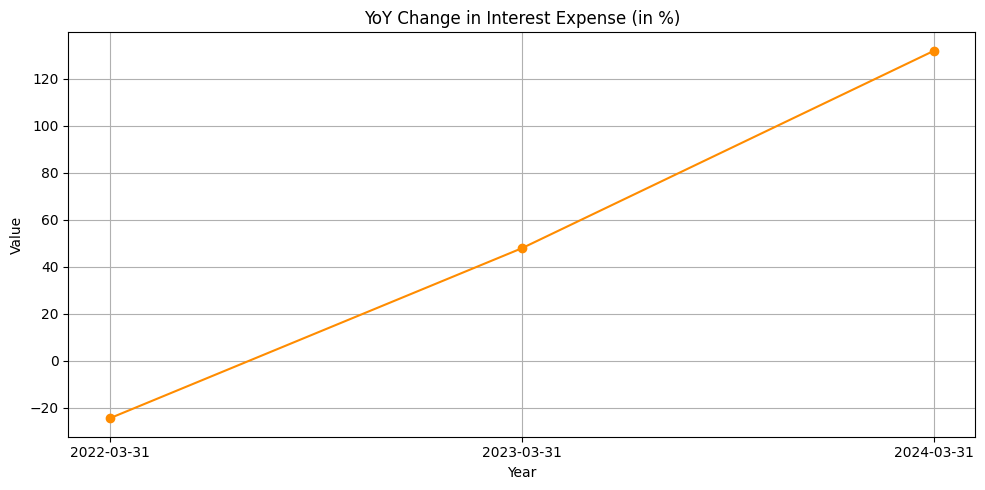

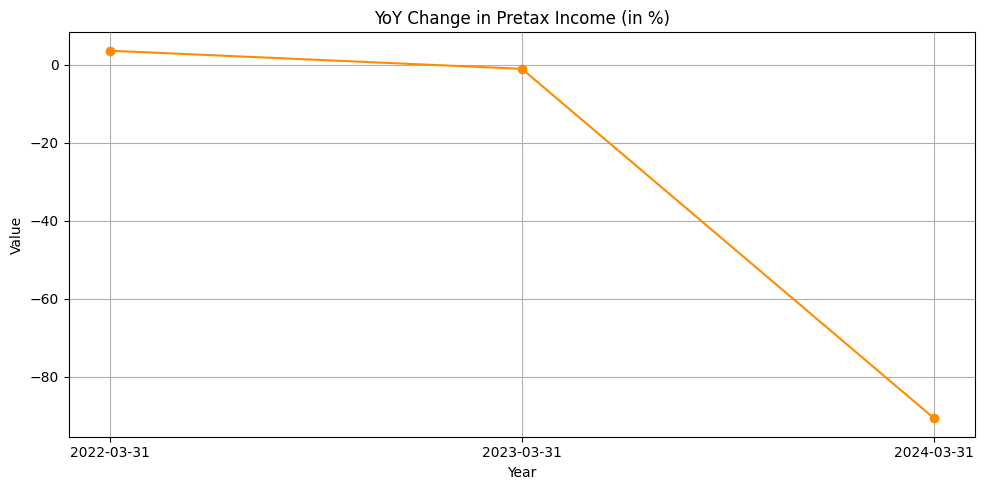

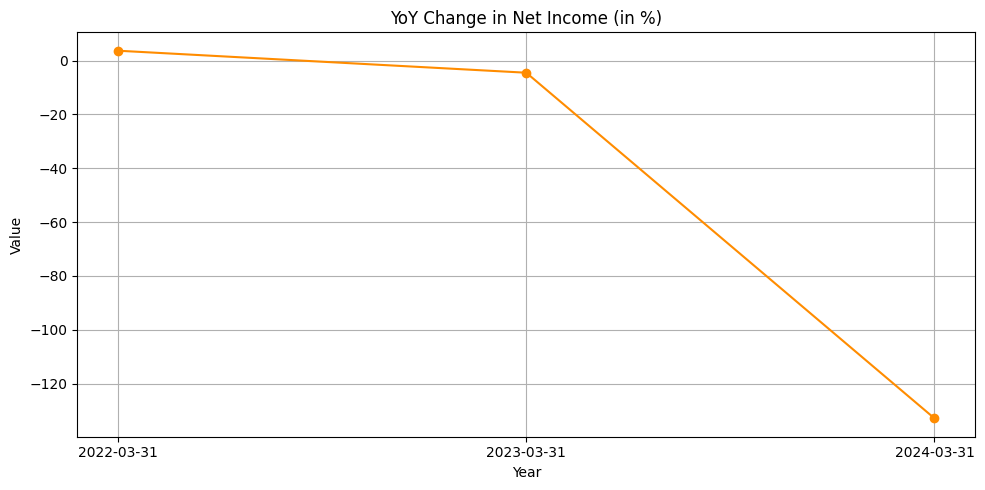

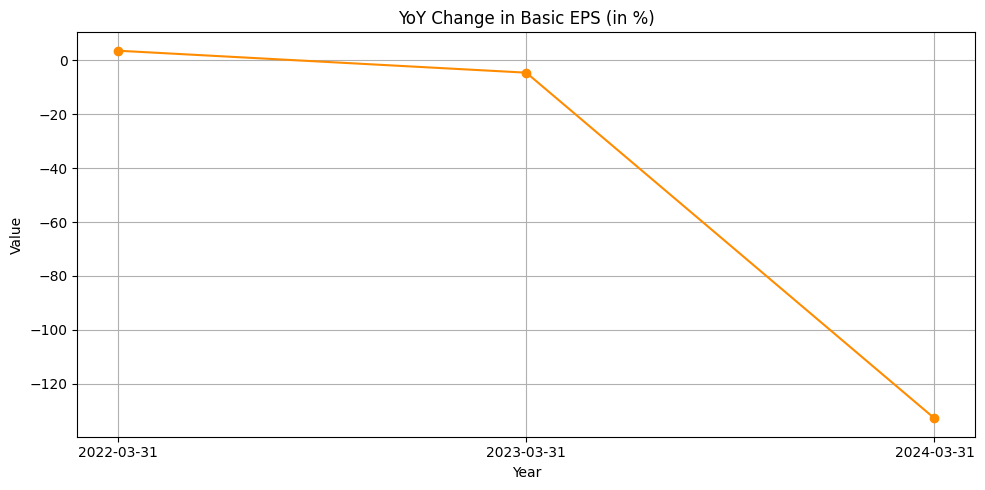

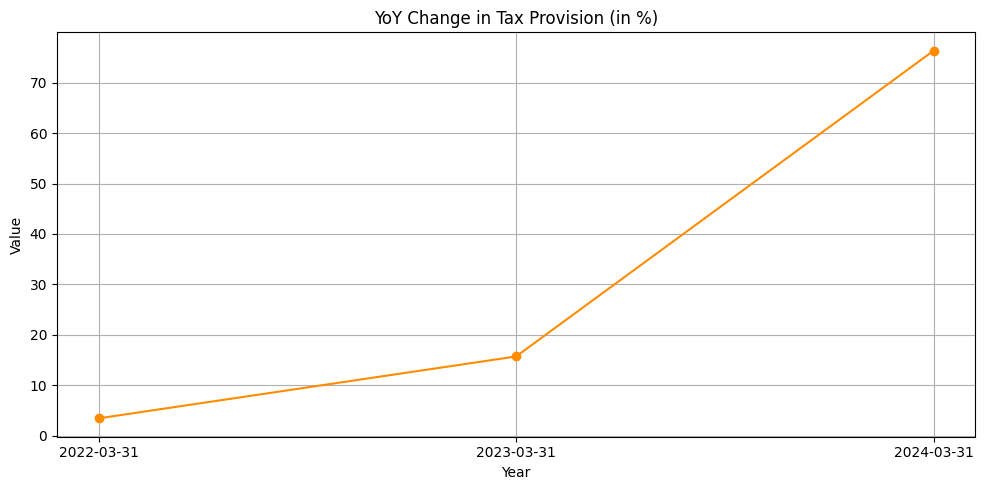

In [ ]:
#Plotting horizontal analysis ratios

import pandas as pd
import matplotlib.pyplot as plt

# Load the horizontal analysis Excel file
file_path = 'horizontal_analysis.xlsx'
balance_sheet = pd.read_excel(file_path, sheet_name='Sheet1')

# Set the index to the first column for easier manipulation
balance_sheet.set_index(balance_sheet.columns[0], inplace=True)

# List of ratios to plot
ratios_to_plot = [
    'Total Revenue',
    'Operating Revenue',
    'Gross Profit',
    'Operating Income',
    'Operating Expense',
    'Depreciation And Amortization In Income Statement',
    'EBIT',
    'Interest Expense',
    'Pretax Income',
    'Net Income',
    'Basic EPS',
    'Tax Provision'
]


# Plot each ratio on a separate graph
for ratio_name in ratios_to_plot:
    if ratio_name in balance_sheet.index:
        ratio_data = balance_sheet.loc[ratio_name]

        plt.figure(figsize=(10, 5))
        plt.plot(years, ratio_data, marker='o', color='darkorange')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.title(f'YoY Change in {ratio_name} (in %)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [ ]:
#Calculating average of 4 years - Prospective analysis

def add_four_year_avg(df):
    df.rename(columns={df.columns[0]: "Field"}, inplace=True)
    df["4-Year Average"] = df.iloc[:, 1:].mean(axis=1)
    df.reset_index(inplace=True)  # Ensure Field column remains
    return df

# Process balance sheet
file_path = 'common_size_bs.xlsx'
prop_als_bs = pd.read_excel(file_path, sheet_name='Sheet1')
file_path = 'common_size_is.xlsx'
prop_als_is = pd.read_excel(file_path, sheet_name='Sheet1')

# Process income statement
prop_als_bs = add_four_year_avg(common_size_bs)
prop_als_is = add_four_year_avg(common_size_is)

# Process cash flow statement
prop_als_bs.to_excel("prop_als_bs.xlsx", index=False)
prop_als_is.to_excel("prop_als_is.xlsx", index=False)

YF.download() has changed argument auto_adjust default to True


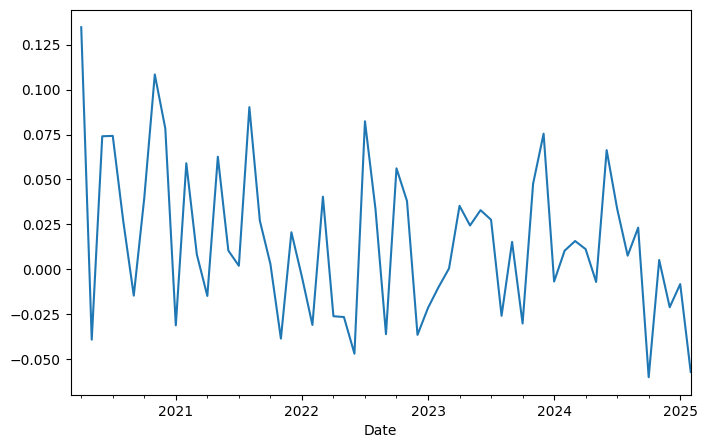

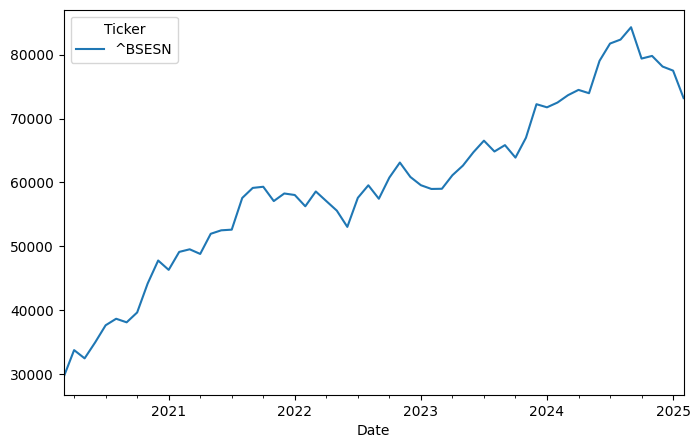

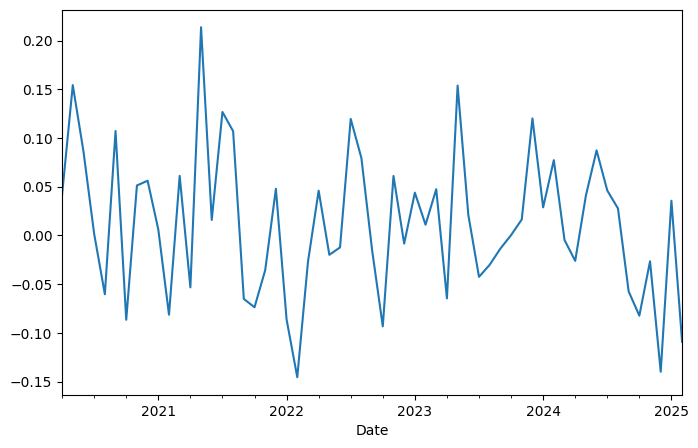

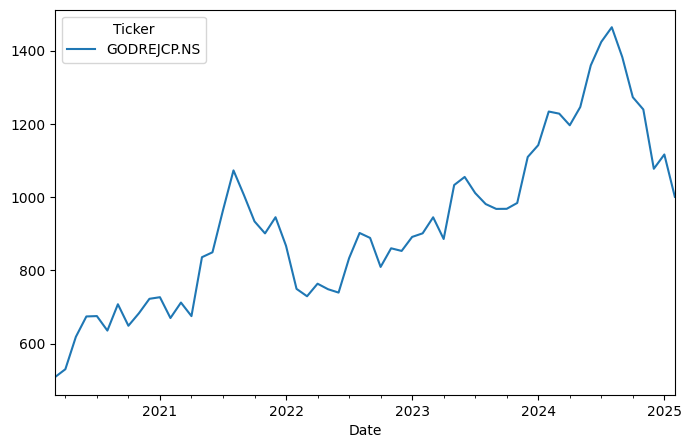

0.015421151200844502


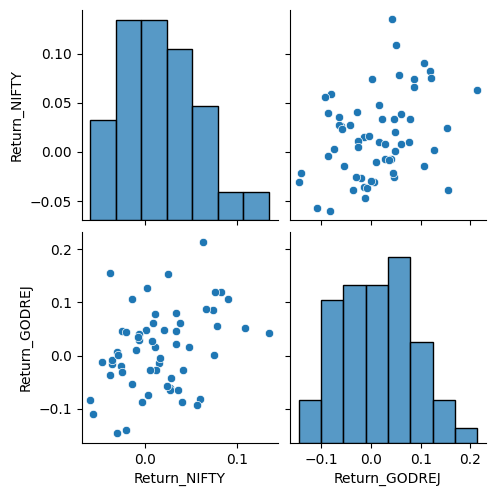

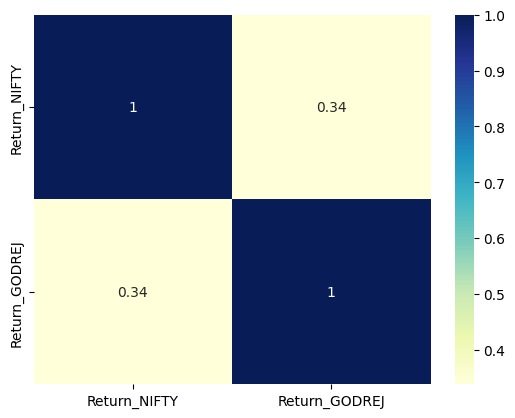

                            OLS Regression Results                            
Dep. Variable:          Return_GODREJ   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     7.354
Date:                Tue, 08 Apr 2025   Prob (F-statistic):            0.00883
Time:                        09:27:43   Log-Likelihood:                 72.647
No. Observations:                  59   AIC:                            -141.3
Df Residuals:                      57   BIC:                            -137.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0023      0.010      0.226   

,0
count,5.900000e+01
mean,-6.586069e-18
std,7.123979e-02
min,-1.296452e-01
25%,-4.775965e-02
50%,6.955580e-03
75%,4.384065e-02
max,1.754067e-01


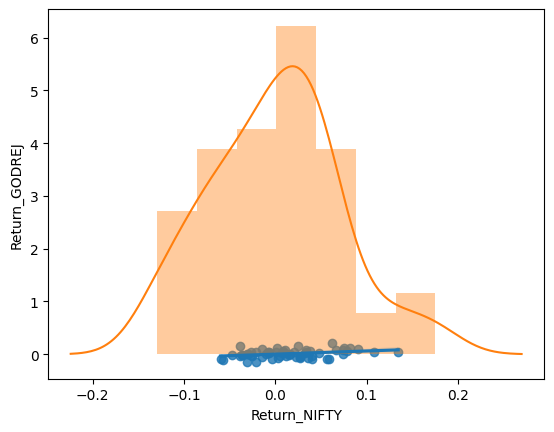

In [ ]:
#Calculating the beta using regression

!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

#Download stock prices for the security monthly data last 5 years
godrej_df = yf.download('GODREJCP.NS',
                      start='2020-03-01',
                      end='2025-03-01',
                      progress=False,interval ='1mo'
)
godrej_df.head()
godrej_df.index = godrej_df.index.tz_localize(None)

#Download Market index closing prices
nifty_df = yf.download('^BSESN',start='2020-03-01',
                      end='2025-03-01',
                      progress=False,interval ='1mo',
)
nifty_df.head()
nifty_df.index = nifty_df.index.tz_localize(None)

#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Close']/nifty_df['Close'].shift(1))
# print(nifty_df['Return_NIFTY'])

nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

nifty_df['Close'].plot(figsize=(8,5))
plt.show()

nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

#Caclulate log returns
godrej_df['Return_GODREJ'] = np.log(godrej_df['Close']/godrej_df['Close'].shift(1))
# print(godrej_df['Return_GODREJ'])
godrej_df['Return_GODREJ'].to_excel('godrej motors log returns.xlsx')

godrej_df1 = godrej_df.dropna(axis=0)
godrej_df1.head()

godrej_df1['Return_GODREJ'].plot(figsize=(8,5))
plt.show()

godrej_df['Close'].plot(figsize=(8,5))
plt.show()

godrej_df1_returns = godrej_df1['Return_GODREJ']
godrej_df1_returns.head()

nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()
average_value = nifty_df1['Return_NIFTY'].mean()
print(average_value)

returns = pd.merge(nifty_df1_returns,godrej_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

sns.pairplot(returns)
plt.show()

sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

x = returns['Return_NIFTY']
y = returns['Return_GODREJ']
x_sm = sm.add_constant(x)

#Regression - Market model
model = sm.OLS(y,x_sm)

results = model.fit()
#Regression result
results.summary()
print(results.summary())
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_GODREJ', data = returns)
# print('resid', results.resid)
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [ ]:
# beta = 0.5983
# Rf = 6.51% compounded annually (Source:https://www.rbi.org.in/Scripts/BS_NSDPDisplay.aspx?param=4)
#Avg monthly market return = 0.015421151200844502
#EAR Market return = Rm = 0.20158491123423
#Rs = Rf + beta*(Rm-Rf) = 0.1467583772

In [ ]:
# Interest Expense = 2482700000
# EBIT = 4465000000
# Interest Coverage ratio = 1.7984452410
# Default Spread = 2.61% (Source:https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ratings.html)
# Risk free rate = 6.51%
# pre tax cost of debt(Rb) = 9.12%
# tax rate = 0.3 (from income statement)
# after tax cost of debt(Rb*(1-T)) = 6.384%

In [ ]:
# No of shares = 1022820329
# Book value of share = 123
# Market value of equity(S) = 125806900467
# Market value of debt(B) = Book value of debt = 32,22,21,00,000
# B/S = 0.256
# E/V = 0.7961
# B/V = 0.20382
# WACC = E/V*Rs + B/V*Rb*(1-T) = 0.12979

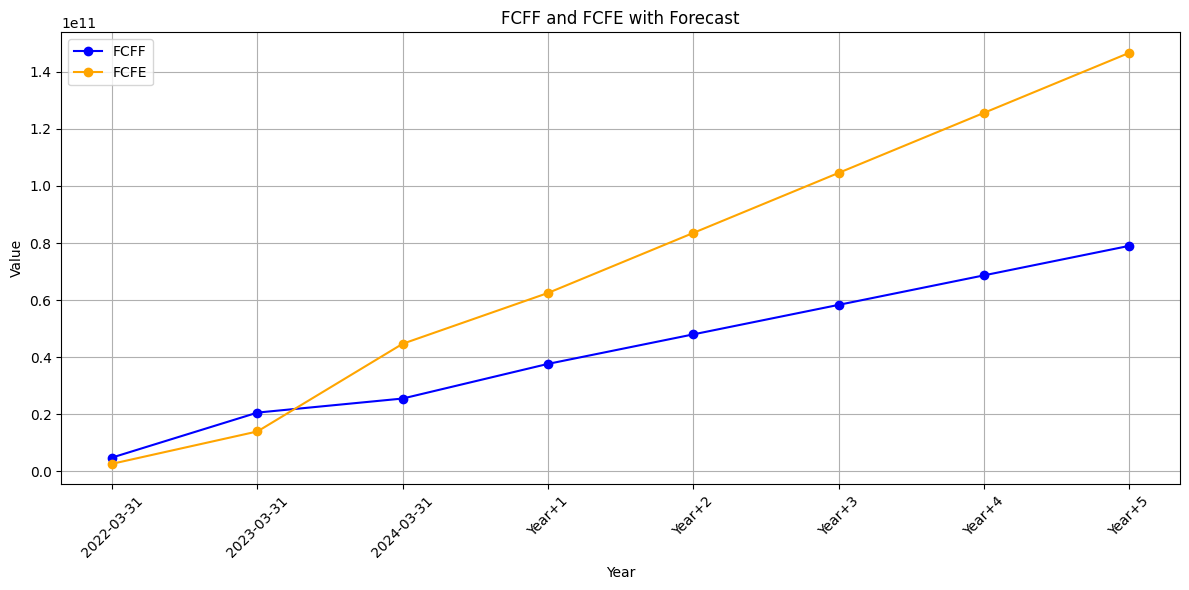

1183650240734.713
NPV of FCFF for GODREJCP: ₹839,483,943,424.62
1698216721158.5554
NPV of FCFE for GODREJCP: ₹1,272,594,703,863.79


In [ ]:
#Calculate the FCFF and FCFE along with projections
!pip install scikit-learn

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = 'balance_sheet.xlsx'
bs = pd.read_excel(file_path)

file_path = 'income_statement.xlsx'
iss = pd.read_excel(file_path)


calculated_bs = pd.DataFrame(columns =bs.columns)

components = {
    'Current Assets Components': [
        'Cash And Cash Equivalents', 'Accounts Receivable', 'Inventory', 'Other Current Assets', 'Prepaid Assets', 'Hedging Assets Current', 'Assets Held For Sale Current', 'Restricted Cash'
    ],

    'Current Liabilities Components': [
        'Accounts Payable', 'Dividends Payable', 'Total Tax Payable', 'Current Provisions', 'Other Current Liabilities', 'Current Debt And Capital Lease Obligation'
    ]
}

for group_name, component_list in components.items():
    calculated_bs.loc[group_name] = bs.loc[component_list].sum()
calculated_bs.loc['NWC'] = calculated_bs.loc['Current Assets Components'] - calculated_bs.loc['Current Liabilities Components']

calculated_bs.loc['Capex'] = bs.loc['Gross PPE'].diff()
calculated_bs.loc['Chg in NWC'] = calculated_bs.loc['NWC'].diff()
calculated_bs.loc['Dep and Amortization'] = iss.loc['Depreciation And Amortization In Income Statement']
calculated_bs.loc['EBIT(1-T)'] = iss.loc['EBIT']*(1-iss.loc['Tax Rate For Calcs'])
calculated_bs.loc['FCFF'] = calculated_bs.loc['EBIT(1-T)'] - calculated_bs.loc['Capex'] + calculated_bs.loc['Dep and Amortization'] - calculated_bs.loc['Chg in NWC']
calculated_bs.loc['NP-P'] = bs.loc['Total Debt'].diff()
calculated_bs.loc['(EBIT-I)(1-T)'] = (iss.loc['EBIT'] - iss.loc['Interest Expense'])*(1-iss.loc['Tax Rate For Calcs'])
calculated_bs.loc['FCFE'] = calculated_bs.loc['(EBIT-I)(1-T)'] - calculated_bs.loc['Capex'] + calculated_bs.loc['Dep and Amortization'] - calculated_bs.loc['Chg in NWC'] + calculated_bs.loc['NP-P']

# Drop NaNs and reset index
fcff_series = calculated_bs.loc['FCFF'].dropna()
fcfe_series = calculated_bs.loc['FCFE'].dropna()

# Use integer indices for regression
years_fcff = np.arange(len(fcff_series)).reshape(-1, 1)
years_fcfe = np.arange(len(fcfe_series)).reshape(-1, 1)

# Fit models
fcff_model = LinearRegression().fit(years_fcff, fcff_series.values)
fcfe_model = LinearRegression().fit(years_fcfe, fcfe_series.values)

# Predict next 5 years
future_years_fcff = np.arange(len(fcff_series), len(fcff_series) + 5).reshape(-1, 1)
future_years_fcfe = np.arange(len(fcfe_series), len(fcfe_series) + 5).reshape(-1, 1)

fcff_forecast = fcff_model.predict(future_years_fcff)
fcfe_forecast = fcfe_model.predict(future_years_fcfe)


 #Combine historical and forecast data
fcff_combined = np.concatenate([fcff_series.values, fcff_forecast])
fcfe_combined = np.concatenate([fcfe_series.values, fcfe_forecast])

# Create x-axis labels
all_years = list(fcff_series.index) + [f'Year+{i+1}' for i in range(5)]
x_ticks = np.arange(len(all_years))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x_ticks, fcff_combined, marker='o', label='FCFF', color='blue')
plt.plot(x_ticks, fcfe_combined, marker='o', label='FCFE', color='orange')

plt.xticks(x_ticks, all_years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('FCFF and FCFE with Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Extend the DataFrame columns to include forecast labels
forecast_labels = [f'Year+{i+1}' for i in range(5)]
calculated_bs = calculated_bs.reindex(columns=list(fcff_series.index) + forecast_labels)

# Save both FCFF and FCFE combined (historical + forecast)
calculated_bs.loc['FCFF'] = fcff_combined
calculated_bs.loc['FCFE'] = fcfe_combined

# Export to Excel
output_file_path = 'fcff_and_fcfe.xlsx'
calculated_bs.to_excel(output_file_path)

wacc = 0.12979  # 10%
g_fcff = 0.0591    # 4%

# Get forecasted FCFF values only (Year+1 to Year+5)
fcff_forecast_values = fcff_forecast
# Use the 5th forecasted FCFF value for terminal value calculation
terminal_value = fcff_forecast_values[-1] * (1 + g_fcff) / (wacc - g_fcff)
print(terminal_value)
# Add terminal value to the last forecasted FCFF
fcff_forecast_values_with_terminal = fcff_forecast_values.copy()
fcff_forecast_values_with_terminal[-1] += terminal_value

# Calculate NPV of forecasted FCFF + terminal value
npv_fcff = sum([fcff / ((1 + wacc) ** (i + 1)) for i, fcff in enumerate(fcff_forecast_values_with_terminal)])

# Print result
print(f"NPV of FCFF for GODREJCP: ₹{npv_fcff:,.2f}")


g_fcfe = 0.04     # 4%

# Get forecasted FCFE values only (Year+1 to Year+5)
fcfe_forecast_values = fcfe_forecast  # Already a NumPy array from your regression

# Use the 5th forecasted FCFE value for terminal value calculation
terminal_value = fcfe_forecast_values[-1] * (1 + g_fcfe) / (wacc - g_fcfe)
print(terminal_value)

# Add terminal value to the last forecasted FCFE
fcfe_forecast_values_with_terminal = fcfe_forecast_values.copy()
fcfe_forecast_values_with_terminal[-1] += terminal_value

# Calculate NPV of forecasted FCFE + terminal value
npv_fcfe = sum([fcfe / ((1 + wacc) ** (i + 1)) for i, fcfe in enumerate(fcfe_forecast_values_with_terminal)])

# Print result
print(f"NPV of FCFE for GODREJCP: ₹{npv_fcfe:,.2f}")


Loaded 3 historical FCFF points.
Loaded 3 historical FCFE points.

--- Checking Loaded Indexes ---
prop_is index loaded correctly (contains 'EBIT').
prop_bs index loaded correctly (contains 'Total Assets').
-----------------------------

Average Historical Revenue Growth: 8.54%

--- Forecasted Financials and Cash Flows (Key Items) ---
                       Year+1        Year+2        Year+3        Year+4  \
Total Revenue    1.516605e+11  1.645971e+11  1.786372e+11  1.938750e+11   
EBIT(1-T)        1.944444e+10  2.110305e+10  2.290315e+10  2.485678e+10   
Forecasted FCFF  6.205434e+09  2.282253e+10  2.476930e+10  2.688212e+10   
Forecasted FCFE  3.016111e+09  1.936116e+10  2.101267e+10  2.280505e+10   

                       Year+5  
Total Revenue    2.104125e+11  
EBIT(1-T)        2.697707e+10  
Forecasted FCFF  2.917516e+10  
Forecasted FCFE  2.475032e+10  

Terminal Value (FCFF basis): ₹ 437,111,534,655
NPV of FCFF (Enterprise Value): ₹ 310,365,133,328

Cost of Equity (Rs): 0.1468


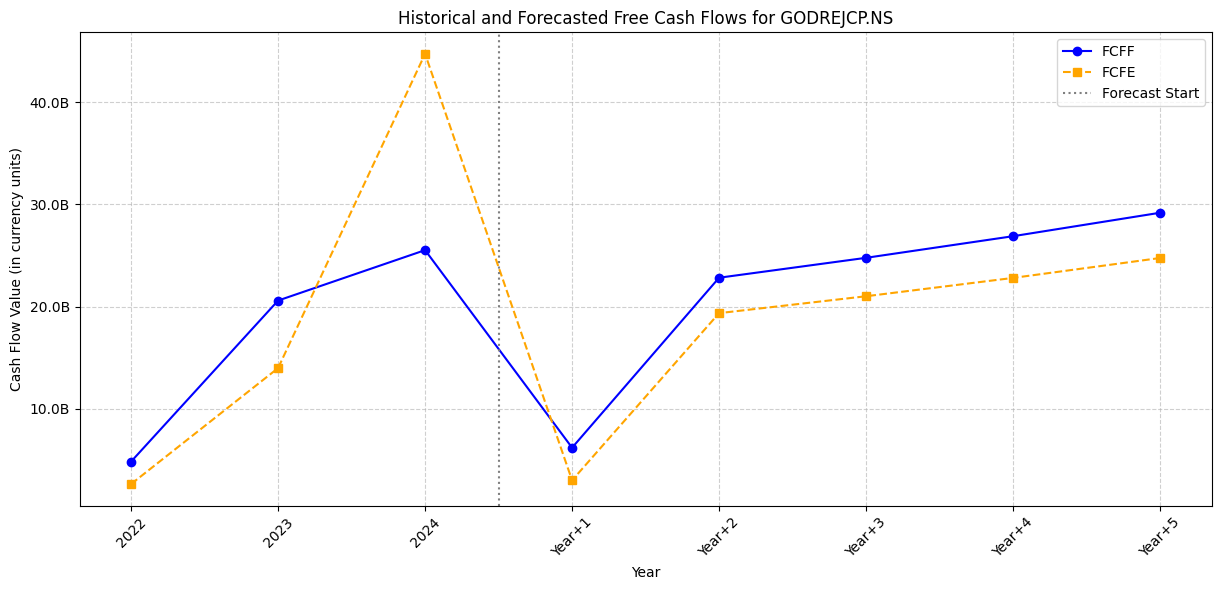


Valuation analysis complete.


In [ ]:
"""
PROJECTION OF FCFF AND FCFE USING AVERAGE OF GROWTH RATES
"""

# Make sure numpy_financial is imported with the alias npf IN THIS BLOCK
import numpy_financial as npf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf # Added for share count and price
import warnings
warnings.filterwarnings("ignore") # Suppress warnings for cleaner output

# --- Define Ticker ---
ticker = "GODREJCP.NS" # Define ticker symbol once

# --- Define constants if not already defined in this scope ---
# These values should ideally come from your previous calculations/analysis
wacc = 0.12979
g_terminal_fcff = 0.0591 # Terminal growth for FCFF
g_terminal_fcfe = 0.0774 # Terminal growth for FCFE
beta = 0.5983
rf = 0.0651
rm = 0.20158491123423
pre_tax_cost_of_debt = 0.0912
revenue_g = 0.0853 # ASSUMPTION: Future Revenue Growth Rate (e.g., 8%) - ADJUST AS NEEDED

# --- 1. Load Data and Historical Averages ---
try:
    bs_hist = pd.read_excel('balance_sheet.xlsx', index_col=0)
    is_hist = pd.read_excel('income_statement.xlsx', index_col=0)
    # Load the prospective analysis files created earlier (with index)
    prop_is = pd.read_excel('prop_als_is.xlsx', index_col=0)
    prop_bs = pd.read_excel('prop_als_bs.xlsx', index_col=0)

    # Attempt to load previously calculated historical cash flows
    try:
        # Assumes 'fcff_and_fcfe.xlsx' contains HISTORICAL calculated FCFF/FCFE
        # Might need adjustment if this file structure is different
        calculated_bs_hist = pd.read_excel('fcff_and_fcfe.xlsx', index_col=0)
        # Check if FCFF and FCFE rows exist in the loaded historical data
        if 'FCFF' not in calculated_bs_hist.index or 'FCFE' not in calculated_bs_hist.index:
             print("Warning: 'FCFF' or 'FCFE' rows not found in 'fcff_and_fcfe.xlsx'. Historical plot will be incomplete.")
             # Create empty series if missing to avoid errors later
             hist_fcff = pd.Series(dtype=float)
             hist_fcfe = pd.Series(dtype=float)
        else:
             # Select only the columns that match the historical income statement years
             hist_cols = is_hist.columns # Get historical year columns
             hist_fcff = calculated_bs_hist.loc['FCFF', calculated_bs_hist.columns.intersection(hist_cols)].dropna()
             hist_fcfe = calculated_bs_hist.loc['FCFE', calculated_bs_hist.columns.intersection(hist_cols)].dropna()
             print(f"Loaded {len(hist_fcff)} historical FCFF points.")
             print(f"Loaded {len(hist_fcfe)} historical FCFE points.")

    except FileNotFoundError:
        print("Warning: 'fcff_and_fcfe.xlsx' not found. Cannot load historical FCFF/FCFE for plotting.")
        calculated_bs_hist = pd.DataFrame() # Create empty df
        hist_fcff = pd.Series(dtype=float)
        hist_fcfe = pd.Series(dtype=float)
    except KeyError as e:
        print(f"Warning: KeyError loading historical FCFF/FCFE from 'fcff_and_fcfe.xlsx' - {e}. Plot might be incomplete.")
        hist_fcff = pd.Series(dtype=float)
        hist_fcfe = pd.Series(dtype=float)


    # --- Add a check to confirm the prospective analysis index is correct ---
    print("\n--- Checking Loaded Indexes ---")
    if isinstance(prop_is.index, pd.Index) and 'EBIT' in prop_is.index:
        print("prop_is index loaded correctly (contains 'EBIT').")
    else:
        print("ERROR: prop_is index does not seem correct after loading.")
        print("prop_is index:", prop_is.index)
        exit() # Stop if index is wrong

    if isinstance(prop_bs.index, pd.Index) and 'Total Assets' in prop_bs.index:
         print("prop_bs index loaded correctly (contains 'Total Assets').")
    else:
         print("ERROR: prop_bs index does not seem correct after loading.")
         print("prop_bs index:", prop_bs.index)
         exit() # Stop if index is wrong
    print("-----------------------------\n")


except FileNotFoundError as e:
    print(f"Error loading file: {e}. Ensure all required .xlsx files exist.")
    exit()
except KeyError as e:
     print(f"KeyError during initial loading or index check: {e}")
     exit()
except Exception as e:
     print(f"An unexpected error occurred during loading: {e}")
     exit()


# --- Recalculate NWC if needed (ensure calculated_bs_hist has it) ---
try:
    last_hist_year_col = is_hist.columns[-1]
    if 'NWC' not in calculated_bs_hist.index or pd.isna(calculated_bs_hist.loc['NWC', last_hist_year_col]):
        print("Recalculating NWC as it's missing or NaN in calculated_bs_hist...")
        components = {
            'Current Assets Components': ['Cash And Cash Equivalents', 'Accounts Receivable', 'Inventory', 'Other Current Assets', 'Prepaid Assets', 'Hedging Assets Current', 'Assets Held For Sale Current', 'Restricted Cash'],
            'Current Liabilities Components': ['Accounts Payable', 'Dividends Payable', 'Total Tax Payable', 'Current Provisions', 'Other Current Liabilities', 'Current Debt And Capital Lease Obligation']
        }
        # Create a temporary DataFrame to store NWC if calculated_bs_hist is empty or missing NWC
        temp_nwc_df = pd.DataFrame(index=['NWC'], columns=bs_hist.columns)
        for col in bs_hist.columns:
             ca_sum = bs_hist.loc[bs_hist.index.intersection(components['Current Assets Components']), col].sum()
             cl_sum = bs_hist.loc[bs_hist.index.intersection(components['Current Liabilities Components']), col].sum()
             temp_nwc_df.loc['NWC', col] = ca_sum - cl_sum

        if 'NWC' not in calculated_bs_hist.index:
             calculated_bs_hist = pd.concat([calculated_bs_hist, temp_nwc_df]) # Add NWC row
        else:
             calculated_bs_hist.loc['NWC'] = temp_nwc_df.loc['NWC'] # Update NWC row
        print("NWC recalculated/added.")

    last_nwc = calculated_bs_hist.loc['NWC', last_hist_year_col]
    last_total_debt = bs_hist.loc['Total Debt', last_hist_year_col]
except Exception as e:
    print(f"Error trying to get/recalculate NWC or Total Debt: {e}")
    print("Ensure 'bs_hist', 'is_hist', and potentially 'calculated_bs_hist' are correctly populated.")
    exit()
# --------------------------------


# --- Calculate Required Ratios/Averages ---
try:
    avg_rev_growth_hist = (is_hist.loc['Total Revenue'] / is_hist.loc['Total Revenue'].shift(1) - 1).mean()
    print(f"Average Historical Revenue Growth: {avg_rev_growth_hist:.2%}")

    avg_ebit_margin = prop_is.loc['EBIT', '4-Year Average']
    avg_tax_rate = prop_is.loc['Tax Rate For Calcs', '4-Year Average']

    # Ensure 'Net PPE' exists before diff
    if 'Net PPE' in bs_hist.index:
        capex_hist = bs_hist.loc['Net PPE'].diff().fillna(0)
        capex_perc_rev_hist = capex_hist / is_hist.loc['Total Revenue']
        avg_capex_perc_rev = capex_perc_rev_hist.mean()
    else:
        print("Warning: 'Net PPE' not found in balance sheet. Cannot calculate historical Capex % Revenue.")
        avg_capex_perc_rev = 0 # Set default or handle differently

    # Ensure 'Depreciation And Amortization In Income Statement' exists
    if 'Depreciation And Amortization In Income Statement' in is_hist.index:
        dep_perc_rev_hist = is_hist.loc['Depreciation And Amortization In Income Statement'] / is_hist.loc['Total Revenue']
        avg_dep_perc_rev = dep_perc_rev_hist.mean()
    else:
        print("Warning: 'Depreciation And Amortization In Income Statement' not found in income statement. Cannot calculate historical Depreciation % Revenue.")
        avg_dep_perc_rev = 0 # Set default

    # Calculate NWC % Revenue historically and take average
    nwc_hist = calculated_bs_hist.loc['NWC'].copy() # Use NWC calculated/loaded earlier
    nwc_perc_rev_hist = nwc_hist / is_hist.loc['Total Revenue']
    avg_nwc_perc_rev = nwc_perc_rev_hist.mean()

    # Ensure 'Interest Expense' exists
    if 'Interest Expense' in prop_is.index:
        avg_interest_expense_perc_rev = prop_is.loc['Interest Expense', '4-Year Average']
    else:
         print("Warning: 'Interest Expense' average not found in prop_is. Cannot calculate historical Interest Expense % Revenue.")
         avg_interest_expense_perc_rev = 0 # Set default

except KeyError as e:
    print(f"Error accessing average data: Missing key '{e}'. Check source Excel files and calculations.")
    exit()
except Exception as e:
    print(f"Error calculating averages: {e}")
    exit()

# --- 2. Forecast Period Setup ---
forecast_years = 5
forecast_cols = [f"Year+{i+1}" for i in range(forecast_years)] # Use Year+ nomenclature
# Define index for forecast dataframe carefully to avoid duplicates if items exist in both IS & BS
forecast_index = is_hist.index.union(bs_hist.index).union(pd.Index(['Forecasted FCFF', 'Forecasted FCFE', 'Change in NWC', 'Net Debt Issued Assumption', 'EBIT(1-T)', 'Capex Forecast', 'NWC Forecast', 'Total Debt']))
forecast_df = pd.DataFrame(index=forecast_index, columns=forecast_cols, dtype=float)

# --- 3. Forecast Components ---
projected_revenue = {}
current_revenue = is_hist.loc['Total Revenue', last_hist_year_col] # Start from last historical revenue
for i, col in enumerate(forecast_cols):
    current_revenue *= (1 + revenue_g)
    projected_revenue[col] = current_revenue
    forecast_df.loc['Total Revenue', col] = current_revenue

    # Forecast based on averages/assumptions
    forecast_df.loc['EBIT', col] = current_revenue * avg_ebit_margin
    forecast_df.loc['Tax Rate For Calcs', col] = avg_tax_rate # Assume constant tax rate
    forecast_df.loc['EBIT(1-T)', col] = forecast_df.loc['EBIT', col] * (1 - forecast_df.loc['Tax Rate For Calcs', col])

    forecast_df.loc['Capex Forecast', col] = current_revenue * avg_capex_perc_rev
    forecast_df.loc['Depreciation And Amortization In Income Statement', col] = current_revenue * avg_dep_perc_rev

    # Forecast NWC and Change in NWC
    forecast_df.loc['NWC Forecast', col] = current_revenue * avg_nwc_perc_rev
    prev_nwc = forecast_df.loc['NWC Forecast', forecast_cols[i-1]] if i > 0 else last_nwc
    forecast_df.loc['Change in NWC', col] = forecast_df.loc['NWC Forecast', col] - prev_nwc

    # --- 4. Calculate Forecasted FCFF ---
    ebit_1_t = forecast_df.loc['EBIT(1-T)', col]
    capex_f = forecast_df.loc['Capex Forecast', col]
    dep_f = forecast_df.loc['Depreciation And Amortization In Income Statement', col]
    chg_nwc_f = forecast_df.loc['Change in NWC', col]
    # Ensure all components are numbers before calculation
    if pd.isna([ebit_1_t, capex_f, dep_f, chg_nwc_f]).any():
        print(f"Warning: NaN encountered in FCFF calculation for {col}. Setting FCFF to NaN.")
        forecast_df.loc['Forecasted FCFF', col] = np.nan
    else:
        forecast_df.loc['Forecasted FCFF', col] = ebit_1_t - (capex_f - dep_f) - chg_nwc_f # Using Net Capex formulation

    # --- 5. Calculate Forecasted FCFE (Requires Debt Assumptions) ---
    prev_debt = forecast_df.loc['Total Debt', forecast_cols[i-1]] if i > 0 else last_total_debt
    # Ensure prev_debt is a number
    if pd.isna(prev_debt):
        print(f"Warning: Previous year's debt is NaN for {col}. Cannot forecast current debt/interest. Setting FCFE to NaN.")
        forecast_df.loc['Total Debt', col] = np.nan
        forecast_df.loc['Interest Expense', col] = np.nan
        forecast_df.loc['Net Debt Issued Assumption', col] = np.nan
        forecast_df.loc['Forecasted FCFE', col] = np.nan
        continue # Skip FCFE calc for this year

    forecast_df.loc['Total Debt', col] = prev_debt * (1 + revenue_g) # Simplistic debt growth assumption
    forecast_df.loc['Interest Expense', col] = forecast_df.loc['Total Debt', col] * pre_tax_cost_of_debt # Apply cost of debt

    interest_exp_f = forecast_df.loc['Interest Expense', col]
    interest_exp_after_tax = interest_exp_f * (1 - forecast_df.loc['Tax Rate For Calcs', col])

    # *** CRITICAL ASSUMPTION for Net Debt Issued ***
    net_debt_issued_f = 0 # Assumption 1: Net Debt Issued = 0
    forecast_df.loc['Net Debt Issued Assumption', col] = net_debt_issued_f # Record assumption

    # Calculate FCFE = FCFF - Interest(1-T) + Net Debt Issued
    fcff_f = forecast_df.loc['Forecasted FCFF', col]
    if pd.isna([fcff_f, interest_exp_after_tax, net_debt_issued_f]).any():
         print(f"Warning: NaN encountered in FCFE calculation for {col}. Setting FCFE to NaN.")
         forecast_df.loc['Forecasted FCFE', col] = np.nan
    else:
        forecast_df.loc['Forecasted FCFE', col] = fcff_f - interest_exp_after_tax + net_debt_issued_f

# Display the forecast table (key items)
print("\n--- Forecasted Financials and Cash Flows (Key Items) ---")
print(forecast_df.loc[['Total Revenue', 'EBIT(1-T)', 'Forecasted FCFF', 'Forecasted FCFE']].dropna(axis=1, how='all').round(0))

# --- 6. Calculate Terminal Value and NPV (FCFF) ---
last_forecast_year_col = forecast_cols[-1]
fcff_terminal_year = forecast_df.loc['Forecasted FCFF', last_forecast_year_col]

if pd.isna(fcff_terminal_year) or pd.isna(wacc) or pd.isna(g_terminal_fcff):
    print("Error: Cannot calculate FCFF Terminal Value due to NaN input.")
    terminal_value_fcff = np.nan
    npv_fcff_alt = np.nan
else:
    if (wacc - g_terminal_fcff) <= 0:
        print("Error: WACC <= g_terminal_fcff. Cannot calculate FCFF Terminal Value.")
        terminal_value_fcff = np.nan
        npv_fcff_alt = np.nan
    else:
        terminal_value_fcff = fcff_terminal_year * (1 + g_terminal_fcff) / (wacc - g_terminal_fcff)
        print(f"\nTerminal Value (FCFF basis): ₹ {terminal_value_fcff:,.0f}")

        fcff_forecast_values = forecast_df.loc['Forecasted FCFF'].values.astype(float)
        # Handle potential NaNs in forecast before adding terminal value
        if np.isnan(fcff_forecast_values).any():
            print("Warning: NaNs found in FCFF forecast. NPV calculation might be affected.")
            fcff_forecast_values = np.nan_to_num(fcff_forecast_values) # Replace NaN with 0 for NPV

        fcff_values_for_npv = fcff_forecast_values.copy()
        fcff_values_for_npv[-1] += np.nan_to_num(terminal_value_fcff) # Add TV (handle if TV is NaN)

        npv_fcff_alt = npf.npv(wacc, np.insert(fcff_values_for_npv, 0, 0))
        print(f"NPV of FCFF (Enterprise Value): ₹ {npv_fcff_alt:,.0f}")


# --- 7. Calculate Terminal Value and NPV (FCFE) ---
rs = rf + beta * (rm - rf) # Cost of Equity
print(f"\nCost of Equity (Rs): {rs:.4f}")
fcfe_terminal_year = forecast_df.loc['Forecasted FCFE', last_forecast_year_col]

if pd.isna(fcfe_terminal_year) or pd.isna(rs) or pd.isna(g_terminal_fcfe):
    print("Error: Cannot calculate FCFE Terminal Value due to NaN input.")
    terminal_value_fcfe = np.nan
    npv_fcfe_alt = np.nan
else:
    if (rs - g_terminal_fcfe) <= 0:
        print("Error: Rs <= g_terminal_fcfe. Cannot calculate FCFE Terminal Value.")
        terminal_value_fcfe = np.nan
        npv_fcfe_alt = np.nan
    else:
        terminal_value_fcfe = fcfe_terminal_year * (1 + g_terminal_fcfe) / (rs - g_terminal_fcfe)
        print(f"Terminal Value (FCFE basis): ₹ {terminal_value_fcfe:,.0f}")

        fcfe_forecast_values = forecast_df.loc['Forecasted FCFE'].values.astype(float)
        if np.isnan(fcfe_forecast_values).any():
            print("Warning: NaNs found in FCFE forecast. NPV calculation might be affected.")
            fcfe_forecast_values = np.nan_to_num(fcfe_forecast_values) # Replace NaN with 0 for NPV

        fcfe_values_for_npv = fcfe_forecast_values.copy()
        fcfe_values_for_npv[-1] += np.nan_to_num(terminal_value_fcfe) # Add TV

        npv_fcfe_alt = npf.npv(rs, np.insert(fcfe_values_for_npv, 0, 0))
        print(f"NPV of FCFE (Equity Value): ₹ {npv_fcfe_alt:,.0f}")


# --- 8. Comparison and Sanity Check ---
print("\n--- Valuation Sanity Check ---")
enterprise_value_fcff = npv_fcff_alt if not pd.isna(npv_fcff_alt) else 0
equity_value_fcfe = npv_fcfe_alt if not pd.isna(npv_fcfe_alt) else 0
market_value_debt = last_total_debt if not pd.isna(last_total_debt) else 0
print(f"Market Value of Debt (Proxy): ₹ {market_value_debt:,.0f}")

# Implied Equity Value from FCFF approach
implied_equity_value_from_fcff = enterprise_value_fcff - market_value_debt
print(f"Implied Equity Value (from FCFF method): ₹ {implied_equity_value_from_fcff:,.0f}")
print(f"Equity Value (directly from FCFE method): ₹ {equity_value_fcfe:,.0f}")

if equity_value_fcfe != 0: # Avoid division by zero
    diff_perc = abs(implied_equity_value_from_fcff - equity_value_fcfe) / equity_value_fcfe
    print(f"Difference between methods: {diff_perc:.2%}")
    if diff_perc < 0.1: # Allow 10% difference
         print("--> Equity values from FCFF and FCFE methods are reasonably close.")
    else:
         print("--> WARNING: Equity values from FCFF and FCFE methods differ significantly (>10%). Review assumptions.")
else:
    print("--> Cannot compare methods due to zero or invalid FCFE Equity Value.")

# --- 9. Plotting Historical and Forecasted Cash Flows ---
print("\n--- Plotting Cash Flows ---")

# Combine historical and forecast data for plotting
# Use .values to avoid index alignment issues if indices differ slightly
plot_fcff = pd.concat([hist_fcff, forecast_df.loc['Forecasted FCFF']])
plot_fcfe = pd.concat([hist_fcfe, forecast_df.loc['Forecasted FCFE']])

# Create labels for x-axis
# Assuming hist_fcff/fcfe index are datetime-like or year strings
if not hist_fcff.empty:
    hist_labels = [str(idx).split('-')[0] for idx in hist_fcff.index] # Extract Year
else:
    hist_labels = []
x_labels = hist_labels + forecast_cols
x_ticks = np.arange(len(x_labels))

plt.figure(figsize=(12, 6))
if not plot_fcff.empty:
    plt.plot(x_ticks, plot_fcff.values, marker='o', linestyle='-', label='FCFF', color='blue')
if not plot_fcfe.empty:
    plt.plot(x_ticks, plot_fcfe.values, marker='s', linestyle='--', label='FCFE', color='orange')

# Add vertical line separating historical from forecast
if hist_labels:
    plt.axvline(x=len(hist_labels) - 0.5, color='grey', linestyle=':', linewidth=1.5, label='Forecast Start')

plt.xticks(x_ticks, x_labels, rotation=45)
plt.xlabel('Year')
plt.ylabel('Cash Flow Value (in currency units)')
plt.title(f'Historical and Forecasted Free Cash Flows for {ticker}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels overlapping
# Format y-axis to be more readable (e.g., in Billions or Millions)
ax = plt.gca()
current_values = ax.get_yticks()
ax.set_yticklabels([f'{x/1e9:.1f}B' if abs(x) >= 1e9 else f'{x/1e6:.1f}M' for x in current_values])

plt.show()

'''
# --- 10. Implied Share Price Calculation & Summary ---
print("\n--- Implied Share Price Analysis ---")

# Get Shares Outstanding
try:
    stock_info = yf.Ticker(ticker).info
    shares_outstanding = stock_info.get('sharesOutstanding')
    # Fallback using historical data if yfinance fails or returns None
    if not shares_outstanding and 'Ordinary Shares Number' in bs_hist.index:
        shares_outstanding = bs_hist.loc['Ordinary Shares Number', last_hist_year_col]
        print("Used historical Ordinary Shares Number as fallback.")

    if not shares_outstanding or pd.isna(shares_outstanding):
         # Final fallback to user's hardcoded value if still no data
         shares_outstanding = 1022820329 # From user comment
         print(f"Warning: Could not retrieve shares dynamically. Using hardcoded value: {shares_outstanding:,.0f}")
    else:
        print(f"Shares Outstanding: {shares_outstanding:,.0f}")

except Exception as e:
    print(f"Error retrieving stock info from yfinance: {e}")
    # Fallback to historical / hardcoded
    if 'Ordinary Shares Number' in bs_hist.index:
         shares_outstanding = bs_hist.loc['Ordinary Shares Number', last_hist_year_col]
         print("Used historical Ordinary Shares Number as fallback.")
    else:
         shares_outstanding = 1022820329 # From user comment
         print(f"Warning: Could not retrieve shares dynamically. Using hardcoded value: {shares_outstanding:,.0f}")

# Use the FCFE-derived equity value for share price calculation
equity_value_for_price = equity_value_fcfe # Or choose implied_equity_value_from_fcff

if equity_value_for_price != 0 and shares_outstanding != 0 and not pd.isna(shares_outstanding):
    implied_share_price = equity_value_for_price / shares_outstanding
    print(f"Calculated Implied Share Price (based on FCFE): ₹ {implied_share_price:.2f}")

    # Get Current Market Price
    try:
        current_price = stock_info.get('currentPrice') or stock_info.get('previousClose')
        if current_price:
            print(f"Current Market Price ({ticker}): ₹ {current_price:.2f}")
            # Compare
            upside_downside = ((implied_share_price / current_price) - 1)
            print(f"Implied Upside/(Downside) vs Current Price: {upside_downside:.2%}")
            if upside_downside > 0.15: # Example threshold
                print("--> Suggests potential undervaluation based on this model's assumptions.")
            elif upside_downside < -0.15:
                print("--> Suggests potential overvaluation based on this model's assumptions.")
            else:
                print("--> Suggests stock is potentially fairly valued based on this model's assumptions.")
        else:
            print("Could not retrieve current market price.")

    except Exception as e:
        print(f"Error retrieving current price: {e}")

else:
    print("Cannot calculate implied share price due to zero/invalid Equity Value or Shares Outstanding.")

'''
# --- End of Script ---
print("\nValuation analysis complete.")